In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:18px;}
</style>
"""))

<b><font color="red" size="6">ch12. 데이터 프레임과 시리즈(Pandas)</font></b>

# 9절. 데이터 그룹화 및 집계

In [1]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
print(iris.shape)
iris.iloc[[0,49,50,99,100,149]]

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
99,5.7,2.8,4.1,1.3,versicolor
100,6.3,3.3,6.0,2.5,virginica
149,5.9,3.0,5.1,1.8,virginica


## 9.1 Group by
cf. pivot_table

In [2]:
# 1) 그룹화 방법1
#    df.groupby(by=[그룹핑할열])[함수적용해서출력할열들].기초통계함수()
    # [함수적용해서출력할열들] : 모든 열이 적용됨
iris_grouped = iris.groupby(iris.Species)
iris_grouped_sum = iris_grouped.sum()
iris_grouped_sum #iris.groupby('Species').sum()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [14]:
iris_grouped_sum.loc[['setosa','virginica']]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
virginica,329.4,148.7,277.6,101.3


In [4]:
print(iris_grouped_sum.columns)
print(iris_grouped_sum.index)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')
Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='Species')


In [5]:
iris_grouped_sum.reset_index(inplace=True) # index를 컬럼 데이터로 편입

In [6]:
iris_grouped_sum

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [7]:
# iris_grouped_sum에서 setosa 그룹함수 결과만 추출
iris_grouped_sum[iris_grouped_sum['Species']=='setosa']
iris_grouped_sum[iris_grouped_sum.Species=='setosa']
iris_grouped_sum.loc[iris_grouped_sum.Species=='setosa']

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3


In [27]:
# iris_grouped_sum에서 setosa와 virginica 그룹함수 결과만 추출
iris_grouped_sum[ (iris_grouped_sum.Species=='setosa') |
                  (iris_grouped_sum.Species=='virginica')]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [29]:
iris_grouped_sum[iris_grouped_sum.Species.isin(['setosa', 'virginica'])]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [31]:
# 1) 그룹화 방법1.1 : 그룹핑할 때 index를 컬럼 데이터로 편입(reset_index 가 필요 X)
#    df.groupby(by=[그룹핑할열], as_index=False)[함수적용해서출력할열들].기초통계함수()
    # [함수적용해서출력할열들] : 모든 열이 적용됨
iris.groupby(iris.Species, as_index=False).sum() # iris.groupby('Species', as_index=False).sum()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [35]:
display(iris.groupby(iris.Species).sum())
display(iris.groupby(['Species']).sum())
display(iris.groupby('Species').sum())

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [38]:
# 종별 Sepal.Length와 Sepal.Width의 평균
iris.groupby('Species').mean()[['Sepal.Length','Sepal.Width']]
iris.groupby('Species')[['Sepal.Length','Sepal.Width']].mean()

,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [39]:
# 종별 Sepal.Length의 합계
iris.groupby('Species')['Sepal.Length'].sum() # 결과가 시리즈(1차원)

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [40]:
# 종별 Sepal.Length의 합계
iris.groupby('Species')[['Sepal.Length']].sum() # 결과가 데이터프레임

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [43]:
# 1) 그룹화 방법1
#   df.groupby(by=[그룹핑할열])[함수적용해서출력할열들].기초통계함수()
# 2) 그룹화 방법2
#   df.pivot_table(index='그룹화할 필드들',
#                  values=['함수적용해서출력할열들'],
#                  aggfunc='함수명(기본값:mean)')
iris.pivot_table(index='Species') # 종별 평균들

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [44]:
#iris.groupby('Species')[['Sepal.Length','Sepal.Width']].sum()
iris.pivot_table(index='Species',
                values=['Sepal.Length','Sepal.Width'],
                aggfunc='sum')

,Sepal.Length,Sepal.Width
Species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


In [45]:
iris.groupby('Species').count() # 결측치를 제외한 데이터 갯수

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [47]:
iris.pivot_table(index='Species',
                aggfunc='count')# 결측치를 제외한 데이터 갯수

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [59]:
import random
random.sample(range(len(iris)), 3)

[15, 37, 39]

In [52]:
iris.shape[1]-1 # iris의 독립변수 열 갯수

4

In [7]:
import numpy as np
# 각열에 임의의 행에 결측치를 할당
# (0번째열은 결측치1개, 1번째열은 결측치2개, 2번째열은 결측치 3개, 3번째열은 결측치4)
for col in range(iris.shape[1]-1 ):
    iris.iloc[random.sample(range(len(iris)), col+1), col] = np.nan

In [61]:
iris.groupby('Species').count() # 결측치는 빼고 계산

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,49,49,50,48
versicolor,50,49,50,50
virginica,50,50,47,48


In [64]:
result = iris.pivot_table(index='Species',
                aggfunc='count')
result = result[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
result

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,49,49,50,48
versicolor,50,49,50,50
virginica,50,50,47,48


In [65]:
iris['Species'].value_counts() # 종별 데이터 갯수

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

### 다중열로 그룹화

In [67]:
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,1.4,0.2,setosa


In [73]:
# iris로 다중열 그룹화하기 위해서 데이터 추가(num 필드)
# iris의 행수가 150개 = Species 3그룹 , num 6그룹
[[i]*25 for i in range(6)]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]

In [79]:
import numpy as np
iris['num'] = np.ravel([[i]*25 for i in range(6)])
iris.iloc[::10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,NaN,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


In [81]:
# 종별, num별 합계
r = iris.groupby(by=['Species','num']).sum()
r

Sepal.Length  ...  Petal.Width
Species    num                ...             
setosa     0           120.9  ...          6.2
           1           124.6  ...          5.7
versicolor 2           150.3  ...         33.6
           3           146.5  ...         32.7
virginica  4           164.4  ...         48.7
           5           165.0  ...         48.4

[6 rows x 4 columns]

In [82]:
r.index

MultiIndex([(    'setosa', 0),
            (    'setosa', 1),
            ('versicolor', 2),
            ('versicolor', 3),
            ( 'virginica', 4),
            ( 'virginica', 5)],
           names=['Species', 'num'])

In [85]:
r.loc[['setosa','virginica']] # setosa와 virginica만 결과 추출

Sepal.Length  ...  Petal.Width
Species   num                ...             
setosa    0           120.9  ...          6.2
          1           124.6  ...          5.7
virginica 4           164.4  ...         48.7
          5           165.0  ...         48.4

[4 rows x 4 columns]

In [86]:
# 종별, num별 중위수 ('Species','num'이 컬럼 데이터로 편입)
r = iris.groupby(by=['Species','num'], as_index=False).median()
r

,Species,num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,5.05,3.40,1.50,0.2
1,setosa,1,5.00,3.40,1.50,0.2
2,versicolor,2,6.10,2.80,4.50,1.4
3,versicolor,3,5.70,2.75,4.20,1.3
4,virginica,4,6.50,2.90,5.55,2.0
5,virginica,5,6.40,3.00,5.50,2.0


In [94]:
# setosa와 virginica 추출
r[ (r['Species']=='setosa') | (r['Species']=='virginica')]
r[ r['Species'].isin(['setosa','virginica'])]

,Species,num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,5.05,3.4,1.50,0.2
1,setosa,1,5.00,3.4,1.50,0.2
4,virginica,4,6.50,2.9,5.55,2.0
5,virginica,5,6.40,3.0,5.50,2.0


In [97]:
# iris.groupby(by=['Species','num']).sum() 와 동일
iris.pivot_table(index=['Species','num'],
                # values=[],
                aggfunc='sum')

Petal.Length  ...  Sepal.Width
Species    num                ...             
setosa     0            36.5  ...         83.5
           1            36.6  ...         84.4
versicolor 2           107.8  ...         69.4
           3           105.2  ...         66.3
virginica  4           135.3  ...         73.2
           5           125.5  ...         75.5

[6 rows x 4 columns]

In [98]:
# 종별 기초 통계량(min, max, count, mean, median, Q1, Q3, std...) 모두
iris.groupby(['Species']).describe()

Sepal.Length            ...  num     
                  count      mean  ...  75%  max
Species                            ...          
setosa             49.0  5.010204  ...  1.0  1.0
versicolor         50.0  5.936000  ...  3.0  3.0
virginica          50.0  6.588000  ...  5.0  5.0

[3 rows x 40 columns]

In [99]:
iris.groupby(['Species']).describe().T

Species                setosa  ...  virginica
Sepal.Length count  49.000000  ...  50.000000
             mean    5.010204  ...   6.588000
             std     0.354874  ...   0.635880
             min     4.300000  ...   4.900000
             25%     4.800000  ...   6.225000
             50%     5.000000  ...   6.500000
             75%     5.200000  ...   6.900000
             max     5.800000  ...   7.900000
Sepal.Width  count  49.000000  ...  50.000000
             mean    3.426531  ...   2.974000
             std     0.382849  ...   0.322497
             min     2.300000  ...   2.200000
             25%     3.200000  ...   2.800000
             50%     3.400000  ...   3.000000
             75%     3.700000  ...   3.175000
             max     4.400000  ...   3.800000
Petal.Length count  50.000000  ...  47.000000
             mean    1.462000  ...   5.548936
             std     0.173664  ...   0.561393
             min     1.000000  ...   4.500000
             25%     1.400000  ...   5.100000
             50%     1.500000  ...   5.500000
             75%     1.575000  ...   5.850000
             max     1.900000  ...   6.900000
Petal.Width  count  48.000000  ...  48.000000
             mean    0.247917  ...   2.022917
             std     0.107168  ...   0.273075
             min     0.100000  ...   1.400000
             25%     0.200000  ...   1.800000
             50%     0.200000  ...   2.000000
             75%     0.300000  ...   2.300000
             max     0.600000  ...   2.500000
num          count  50.000000  ...  50.000000
             mean    0.500000  ...   4.500000
             std     0.505076  ...   0.505076
             min     0.000000  ...   4.000000
             25%     0.000000  ...   4.000000
             50%     0.500000  ...   4.500000
             75%     1.000000  ...   5.000000
             max     1.000000  ...   5.000000

[40 rows x 3 columns]

In [104]:
g = iris.groupby(['Species'])[['Sepal.Length',
                              'Sepal.Width',
                              'Petal.Length',
                              'Petal.Width']].mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.010204,3.426531,1.462000,0.247917
versicolor,5.936000,2.769388,4.260000,1.326000
virginica,6.588000,2.974000,5.548936,2.022917


https://stackoverflow.com/questions/30490740/move-legendoutside-figure-in-seaborn-tsplot : 범례사용

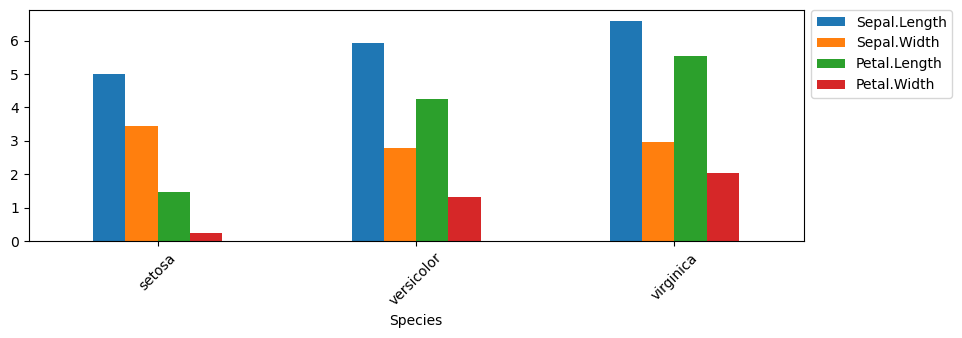

In [114]:
import matplotlib.pyplot as plt
g.plot(kind='bar', figsize=(10,3), rot=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

In [115]:
# 종별, num별 평균
g = iris.groupby(['Species', 'num']).mean()
g

Sepal.Length  ...  Petal.Width
Species    num                ...             
setosa     0          5.0375  ...     0.248000
           1          4.9840  ...     0.247826
versicolor 2          6.0120  ...     1.344000
           3          5.8600  ...     1.308000
virginica  4          6.5760  ...     2.029167
           5          6.6000  ...     2.016667

[6 rows x 4 columns]

In [117]:
# g의 level0 인덱스만 그대로 두고, level1 인덱스를 컬럼값으로 올려
g.unstack()

Sepal.Length         ... Petal.Width          
num                   0      1  ...           4         5
Species                         ...                      
setosa           5.0375  4.984  ...         NaN       NaN
versicolor          NaN    NaN  ...         NaN       NaN
virginica           NaN    NaN  ...    2.029167  2.016667

[3 rows x 24 columns]

In [118]:
g.unstack().T

Species             setosa  versicolor  virginica
             num                                 
Sepal.Length 0    5.037500         NaN        NaN
             1    4.984000         NaN        NaN
             2         NaN      6.0120        NaN
             3         NaN      5.8600        NaN
             4         NaN         NaN   6.576000
             5         NaN         NaN   6.600000
Sepal.Width  0    3.479167         NaN        NaN
             1    3.376000         NaN        NaN
             2         NaN      2.7760        NaN
             3         NaN      2.7625        NaN
             4         NaN         NaN   2.928000
             5         NaN         NaN   3.020000
Petal.Length 0    1.460000         NaN        NaN
             1    1.464000         NaN        NaN
             2         NaN      4.3120        NaN
             3         NaN      4.2080        NaN
             4         NaN         NaN   5.637500
             5         NaN         NaN   5.456522
Petal.Width  0    0.248000         NaN        NaN
             1    0.247826         NaN        NaN
             2         NaN      1.3440        NaN
             3         NaN      1.3080        NaN
             4         NaN         NaN   2.029167
             5         NaN         NaN   2.016667

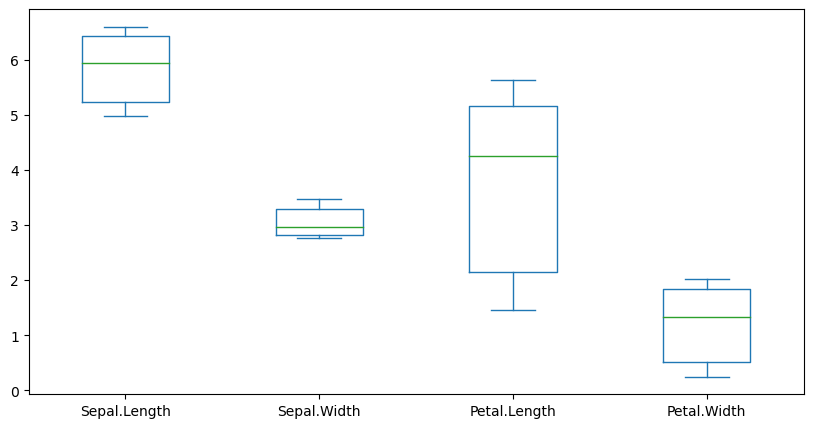

In [120]:
g.plot(kind='box', figsize=(10,5))
plt.show()

## 9.2 그룹간 데이터 처리

In [122]:
iris_grouped = iris.groupby('Species')
iris_grouped

In [125]:
for speciename, group in iris_grouped:
    print(speciename)
    display(group.head(3))
    print('■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,NaN,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
52,6.9,3.1,4.9,1.5,versicolor,2


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
101,5.8,2.7,5.1,1.9,virginica,4
102,7.1,3.0,5.9,2.1,virginica,4


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


In [135]:
# 종별 임의의 표본 5개씩 출력
# iris.sample(5).sort_index()
for idx, (speciesname, group) in enumerate(iris_grouped):
    print('{}번째 그룹은 {}'.format(idx, speciesname))
    display(group.sample(5).sort_index())

0번째 그룹은 setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
23,5.1,3.3,1.7,0.5,setosa,0
32,5.2,4.1,1.5,0.1,setosa,1
37,4.9,3.6,1.4,0.1,setosa,1
42,4.4,3.2,1.3,0.2,setosa,1
44,5.1,3.8,1.9,0.4,setosa,1


1번째 그룹은 versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
58,6.6,2.9,4.6,1.3,versicolor,2
59,5.2,2.7,3.9,1.4,versicolor,2
63,6.1,2.9,4.7,1.4,versicolor,2
68,6.2,2.2,4.5,1.5,versicolor,2
78,6.0,2.9,4.5,1.5,versicolor,3


2번째 그룹은 virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
112,6.8,3.0,5.5,2.1,virginica,4
114,5.8,2.8,5.1,NaN,virginica,4
129,7.2,3.0,5.8,1.6,virginica,5
134,6.1,2.6,5.6,1.4,virginica,5
137,6.4,3.1,5.5,1.8,virginica,5


In [138]:
# 종별 0,10,20,30,40번째 데이터 출력 : s:0,10,20,30,40행, vc: 50,60,70,80,90, vn:100,110
for speciesname, group in iris.groupby('Species'):
    print(speciesname, '그룹 ')
    display(group.iloc[0::10]) # group.iloc[0,10,20,30,40]

setosa 그룹 


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,NaN,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1


versicolor 그룹 


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


virginica 그룹 


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
110,6.5,3.2,5.1,2.0,virginica,4
120,6.9,3.2,NaN,2.3,virginica,4
130,7.4,2.8,6.1,1.9,virginica,5
140,6.7,3.1,5.6,2.4,virginica,5


## 9.3 데이터 프레임 그룹 인덱싱

In [140]:
t = iris.groupby('Species').take([0,10,20,30,40])
t

Sepal.Length  ...  num
Species                       ...     
setosa     0             5.1  ...    0
           10            5.4  ...    0
           20            5.4  ...    0
           30            4.8  ...    1
           40            5.0  ...    1
versicolor 50            7.0  ...    2
           60            5.0  ...    2
           70            5.9  ...    2
           80            5.5  ...    3
           90            5.5  ...    3
virginica  100           6.3  ...    4
           110           6.5  ...    4
           120           6.9  ...    4
           130           7.4  ...    5
           140           6.7  ...    5

[15 rows x 5 columns]

In [141]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,num
0,5.1,NaN,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
20,5.4,3.4,1.7,0.2,0
30,4.8,3.1,1.6,0.2,1
40,5.0,3.5,1.3,0.3,1


## 9.4 레이블(원핫인코딩)

In [144]:
iris.drop('num', axis=1, inplace=True)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [145]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,NaN,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [147]:
# 레이블(원핫인코딩)을 지원하는 패키지 이용
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # 객체
iris['target'] = le.fit_transform(iris.Species)
iris.iloc[::25]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,target
0,5.1,NaN,1.4,0.2,setosa,0
25,5.0,3.0,1.6,0.2,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
75,6.6,3.0,4.4,1.4,versicolor,1
100,6.3,3.3,6.0,2.5,virginica,2
125,7.2,3.2,NaN,1.8,virginica,2


# 10절. 데이터 구조 변경
## 10.1 와이드포맷 <-> 롱포맷
- 판다스 공식 문서에 나오는 melt : https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt 
- [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf ) 7page

In [151]:
import statsmodels.api as sm
airquality = sm.datasets.get_rdataset('airquality', package='datasets').data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 10.2 melt를 이용한 언피벗팅(와이드포맷->롱포맷)

In [152]:
airquality_melted = airquality.melt(id_vars=['Month','Day'])
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [161]:
airquality_melted = airquality.melt(id_vars=['Month','Day'], 
               var_name='변수명', # melt된 열의 이름
               value_name='값') # 데이터가 된 열의 이름
airquality_melted = airquality_melted.sort_values(by=['Month','Day'])
airquality_melted.reset_index(drop=True)

,Month,Day,변수명,값
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0
...,...,...,...,...
607,9,29,Temp,76.0
608,9,30,Ozone,20.0
609,9,30,Solar.R,223.0
610,9,30,Wind,11.5


### melt연습하기 예제(와일드포맷->롱포맷)

In [162]:
%ls D:\ai\Downloads\shareData

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2D0E-15FE

 D:\ai\Downloads\shareData 디렉터리

2024-11-25  오후 12:39    <DIR>          .
2024-11-25  오후 12:39    <DIR>          ..
2024-11-18  오후 04:13    <DIR>          상가정보
2024-11-18  오후 04:02       290,230,709 소상공인시장진흥공단_상가(상권)정보_20240930.zip
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2024-11-18  오후 03:57           415,443 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv
               3개 파일         290,648,315 바이트
               3개 디렉터리  474,268,532,736 바이트 남음


In [167]:
df_first = pd.read_csv(r'D:\ai\Downloads\shareData\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding='cp949')
df_last = pd.read_csv(r'D:\ai\Downloads\shareData\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv',
                      encoding='cp949')
df_first.shape, df_last.shape

((17, 22), (9010, 5))

In [165]:
df_first.head(1) # => new_first(지역명, 연도, 월, 분양가격(제곱미터))

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [168]:
df_last.head(1) # => new_last(모든면적 행만 지역명,연도, 월, 분양가격(제곱미터) )

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841


In [172]:
# 지역 연도월 평당분양가격 식의 롱포맷 데이터로 바꾸기
new_first = df_first.melt(id_vars=['지역'], var_name='연도월', value_name="평당분양가격")
new_first.sample(1)

,지역,연도월,평당분양가격
16,제주,2013년12월,7674


In [175]:
#연도월 컬럼을 연도, 월로 분리 "2013년12월 => 2013, 12"
def parse_year(x):
    return int(x.split('년')[0])
parse_year("2013년12월")

2013

In [188]:
# new_first['연도월'].map(lambda x : int(x.split('년')[0])) # map은 1차원에서 가능
new_first['연도'] = new_first['연도월'].apply(lambda x : \
                                int(x.split('년')[0])) # apply는 1, 2차원 모두 가능
new_first.head(1)

,지역,연도월,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [192]:
def parse_month(x):
    return int(x.split('년')[-1].replace('월',''))
parse_month("2013년12월")

12

In [194]:
new_first['월'] = new_first['연도월'].map(lambda x : int(x.split('년')[-1].replace('월','')))
new_first.tail(1)

,지역,연도월,평당분양가격,연도,월
356,제주,2015년8월,7343,2015,8


In [195]:
# 평당분양가격/3.3 => 분양가격(제곱미터)
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.1+ KB


In [197]:
new_first['분양가격(제곱미터)'] = new_first['평당분양가격']/3.3
new_first.sample(1)

,지역,연도월,평당분양가격,연도,월,분양가격(제곱미터)
340,서울,2015년8월,18443,2015,8,5588.787879


In [199]:
# '연도월', '평당분양가격' 필드 삭제, column명을 지역->지역명
new_first.drop(['연도월','평당분양가격'], axis=1, inplace=True)
new_first.columns = ['지역명','연도','월','분양가격(제곱미터)']
new_first.head()

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182
1,부산,2013,12,2457.878788
2,대구,2013,12,2448.484848
3,인천,2013,12,3092.121212
4,광주,2013,12,1847.878788


In [209]:
# df_last =>  new_last(모든면적 행만 지역명,연도, 월, 분양가격(제곱미터) )
new_last = df_last[df_last['규모구분'] == '모든면적']
new_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841


In [210]:
# new_last의 규모구분 열 삭제
new_last = new_last.drop(['규모구분'], axis=1)
new_last.head(1)

,지역명,연도,월,분양가격(제곱미터)
0,서울,2015,10,5841


In [211]:
new_first.head(1)

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182


In [212]:
df = pd.concat( [new_first, new_last])
df.head()

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182
1,부산,2013,12,2457.878788
2,대구,2013,12,2448.484848
3,인천,2013,12,3092.121212
4,광주,2013,12,1847.878788


## 10.3 pivot_table을 이용한 피벗팅(롱포맷->와이드포맷)

In [218]:
airquality_melted = airquality.melt(id_vars=['Month','Day'])
airquality_melted = airquality_melted.sort_values(['Month','Day']).reset_index(drop=True)
airquality_melted.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0


In [227]:
airquality2 = airquality_melted.pivot_table(index=['Month','Day'],
                             columns=['variable'],
                             values=['value'])
airquality2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

In [228]:
airquality2.reset_index(level=['Month', 'Day'], col_level=1, inplace=True)
airquality2.head(1)

value                   
variable Month Day Ozone Solar.R  Temp Wind
0            5   1  41.0   190.0  67.0  7.4

In [230]:
airquality2.columns = airquality2.columns.droplevel(level=0) # 0번 level의 컬럼 제거
airquality2.head(1)

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4


In [239]:
airquality2.columns.name = ''
airquality2.head(1)

,Month,Day,Ozone,Solar.R,Temp,Wind
,,,,,,
0,5,1,41.0,190.0,67.0,7.4


### pivot_table(), pivot() 함수의 차이

In [242]:
import numpy as np
year = [2020]*3 + [2021]*3
mon = [1, 2, 3] * 2
latte = [410,401,402,400,404,405]
americano = [500,483,484,470,486,488]
mocha = [350,299,300,301,302,300]
sales = pd.DataFrame(np.c_[year, mon, latte, americano, mocha],
                    columns=['year','mon','latte','americano','mocha'])
sales

,year,mon,latte,americano,mocha
0,2020,1,410,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,400,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [245]:
sales.groupby(['year'])[['latte','americano','mocha']].sum()

,latte,americano,mocha
year,,,
2020,1213,1467,949
2021,1209,1444,903


In [249]:
result = sales.pivot_table(index='year',
                 values=['latte','americano','mocha'],
                 aggfunc='sum')
result

,americano,latte,mocha
year,,,
2020,1467,1213,949
2021,1444,1209,903


In [247]:
result.loc[2021]

americano    1444
latte        1209
mocha         903
Name: 2021, dtype: int32

In [253]:
# pivot()
sales = sales.loc[:, 'year':'latte']
sales

,year,mon,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


In [254]:
sales.pivot(index='year', columns='mon')

latte          
mon      1    2    3
year                
2020   410  401  402
2021   400  404  405

# 11절. 데이터프레임에 함수 적용시키기
- apply(func, axis) : (데이터프레임이나 시리즈 모두 적용 가능)
- applymap(func) : 각 요소별로 적용(데이터 프레임에서만 가능)
- map(func) : 각 요소별로 적용(1차원 시리즈에서만 가능)

## 11.1 apply

In [262]:
# ex1. 1차원 시리즈에 apply 사용
member = pd.read_csv('data/ch12_member.csv', comment='#')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     5 non-null      object
 1   Age      5 non-null      int64 
 2   Email    5 non-null      object
 3   Address  5 non-null      object
 4   Birth    5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes


In [267]:
def get_month(str):
    return int(str.split('-')[1])
get_month('2000-01-01')

1

In [270]:
member[member['Birth'].apply(lambda str : int(str.split('-')[1]) ) == 1]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [272]:
# ex2. 2차원 데이터프레임에 apply 적용(axis)
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [275]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9010 non-null   object
 1   규모구분        9010 non-null   object
 2   연도          9010 non-null   int64 
 3   월           9010 non-null   int64 
 4   분양가격(제곱미터)  8409 non-null   object
dtypes: int64(2), object(3)
memory usage: 352.1+ KB


In [278]:
def year_month(series):
    return str(series['연도'])+'년'+str(series['월'])+'월'
year_month(df_last.loc[0])

'2015년10월'

In [285]:
df_last['연도월'] \
   = df_last.apply(lambda series : str(series['연도'])+'년'+str(series['월'])+'월',
             axis=1)
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터),연도월
0,서울,모든면적,2015,10,5841,2015년10월


In [4]:
# ex3 iris 데이터의 apply
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [290]:
X = iris.iloc[:, :-1]
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [291]:
X.apply(np.sum, axis=0) # 열별 sum

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
dtype: float64

In [292]:
X.apply(np.sum, axis=1) # 행별 sum

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [293]:
# X의 열별 평균
avg = X.apply(np.average, axis=0)
avg

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [296]:
X.apply(lambda x : round(x-avg, 2), axis=1) # 행별 평균과의 거리를 소수점 2자리까지 출력

,sepal_length,sepal_width,petal_length,petal_width
0,-0.74,0.44,-2.36,-1.0
1,-0.94,-0.06,-2.36,-1.0
2,-1.14,0.14,-2.46,-1.0
3,-1.24,0.04,-2.26,-1.0
4,-0.84,0.54,-2.36,-1.0
...,...,...,...,...
145,0.86,-0.06,1.44,1.1
146,0.46,-0.56,1.24,0.7
147,0.66,-0.06,1.44,0.8
148,0.36,0.34,1.64,1.1


In [297]:
X.apply(lambda x : list(round(x-avg, 2)), axis=1) 

0       [-0.74, 0.44, -2.36, -1.0]
1      [-0.94, -0.06, -2.36, -1.0]
2       [-1.14, 0.14, -2.46, -1.0]
3       [-1.24, 0.04, -2.26, -1.0]
4       [-0.84, 0.54, -2.36, -1.0]
                  ...             
145       [0.86, -0.06, 1.44, 1.1]
146       [0.46, -0.56, 1.24, 0.7]
147       [0.66, -0.06, 1.44, 0.8]
148        [0.36, 0.34, 1.64, 1.1]
149       [0.06, -0.06, 1.34, 0.6]
Length: 150, dtype: object

## 11.2 applymap

In [298]:
X.applymap(np.round)

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [299]:
X.applymap(lambda x : x**2)

,sepal_length,sepal_width,petal_length,petal_width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 11.3 map

In [301]:
# ex1. 1차원 시리즈에 apply 사용
member = pd.read_csv('data/ch12_member.csv', comment='#')
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [304]:
member[member['Birth'].map(lambda date_str : int(date_str.split('-')[1])) == 1]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


# 12절. 일괄 변경하기(결측치나 특정값)
## 12.1 fillna (결측치를 어떤 값으로 바꿈)
- 대부분 결측치는 drop하거나, 평균값대체, 최빈값대체, 중위수대체, 그룹별 평균값, 이전값으로 대체, 
              다음값으로 대체, 회귀식결과값으로 대체함

In [305]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3,      4, np.nan, 1],
                   [np.nan, 3, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [306]:
# 모든 결측치를 무조건 0으로 대체
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [307]:
# 결측치를 이전행의 값으로 대체
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [308]:
# 결측치를 다음행의 값으로 대체 
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [309]:
# 결측치를 특정 대체값으로 바꿈
values = {'A':99, 'B':98, 'C':97, 'D':96}
df.fillna(value=values)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,97.0,4


In [310]:
# 결측치를 열별 평균으로 바꿈
df.fillna(value=df.mean(axis=0))

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [312]:
df.fillna(value=values, limit=3)  # 결측치 대체는 3번째 행까지만

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,NaN,4


## 12.2 replace(to_value, new_value, inplace=T/F)
- to_value를 new_value로 변경
- 정규표현식을 이용 가능

In [317]:
s = pd.Series([0, 1, 2, 3, None])
s.replace(np.nan, 0, inplace=True)
s.replace([0,1], 99) #0이나 1을 99로 변경

0    99.0
1    99.0
2     2.0
3     3.0
4    99.0
dtype: float64

In [320]:
s = pd.Series([0, 1, 2, 3, None])
s.replace([0,1,2], [100,101,102])

0    100.0
1    101.0
2    102.0
3      3.0
4      NaN
dtype: float64

In [322]:
df = pd.DataFrame({'A' : ['bat', 'foo', 'bait'],
                   'B' : ['abc', 'bar', 'xyz']})

In [323]:
df.replace(r'^ba.+$', 'XXX', regex=True)

,A,B
0,XXX,abc
1,foo,XXX
2,XXX,xyz


In [324]:
df.replace({'A':'bat', 'B':'abc'}, 'XXX')

,A,B
0,XXX,XXX
1,foo,bar
2,bait,xyz


## 12.3 where(조건), mask(조건)
    - where(조건) : 조건이 만족하는 요소는 그대로 출력하고 만족하지 않는 요소는 결측치로
    - mask(조건) : where의 반대

In [325]:
s = pd.Series(range(10,20))
s

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [326]:
s[s>15] # 조건이 만족되는 데이터만 출력

6    16
7    17
8    18
9    19
dtype: int64

In [327]:
s.where(s>15) # 조건이 만족되는 데이터는 그대로 출력. 만족되지 않은 데이터는 결측치

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6    16.0
7    17.0
8    18.0
9    19.0
dtype: float64

In [329]:
s.mask(s>15)

0    10.0
1    11.0
2    12.0
3    13.0
4    14.0
5    15.0
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64

## 12.4 dropna
- 결측치가 있는 데이터 누락(행기준, 열기준)

In [330]:
df = pd.DataFrame({'name': ['홍','김','이', np.nan],
                   'age' : [np.nan, 20, 30, np.nan],
                   'born': ['서울','부산',np.nan, np.nan]})
df

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,NaN,NaN


In [331]:
df.dropna() # 결측치가 하나라도 있는 행은 제거 inplace=True가 아니면 return

,name,age,born
1,김,20.0,부산


In [333]:
df.dropna(subset=['name','age']) # name열과 age열에 결측치가 하나라도 있는 행 제거

,name,age,born
1,김,20.0,부산
2,이,30.0,NaN


In [335]:
df.dropna(how='all') # 모두 결측치인 행만 삭제

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN


In [337]:
df.dropna(axis=1) # 결측치가 하나라도 있는 열을 모두 삭제

""
0
1
2
3


In [338]:
df.dropna(axis=1, how='all') # 모두 결측치인 열만 삭제

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,NaN,NaN


In [1]:
import pandas as pd
pd.np.nan

C:\Users\pc\AppData\Local\Temp\ipykernel_11644\3602742180.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.nan


nan

In [3]:
import numpy as np
type(np.nan) # 결측치

float

In [4]:
type(None)

NoneType

In [24]:
## 12절 연습 퀴즈
# 1단계 : iris 데이터에서 결측치를 인위적으로 random하게 열 마다 20씩 결측치를 할당한다
import random
import pandas as pd
import numpy as np
import seaborn as sns
iris = sns.load_dataset('iris')
print(random.sample(range(150),20))
print('iris 데이터의 행과 열수 :',iris.shape)
print('iris 데이터의 갯수 :', len(iris))

[90, 48, 79, 69, 138, 125, 31, 54, 136, 100, 148, 62, 18, 104, 91, 82, 21, 85, 36, 23]
iris 데이터의 행과 열수 : (150, 5)
iris 데이터의 갯수 : 150


In [2]:
# iris 가져와 랜덤하게 열(species제외한 열)마다 20개씩 결측치 할당
for col in range(iris.shape[1]-1):
    iris.iloc[random.sample(range(150),20), col] = np.nan
    
iris.isna().sum() # 열별 결측치 갯수 확인

sepal_length    20
sepal_width     20
petal_length    20
petal_width     20
species          0
dtype: int64

In [3]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,NaN,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,NaN,1.5,0.2,setosa
8,4.4,2.9,NaN,0.2,setosa
9,4.9,3.1,1.5,NaN,setosa


In [4]:
# 2단계 : 결측치가 있는 iris데이터를 출력한다 결측치 여부 return 함수 : isna(), isnull()
# iris['sepal_length'].isna()

In [5]:
iris[iris['sepal_length'].isna()] # sepal_length가 결측치인 데이터 20개

,sepal_length,sepal_width,petal_length,petal_width,species
13,NaN,3.0,1.1,NaN,setosa
21,NaN,3.7,1.5,0.4,setosa
22,NaN,3.6,1.0,0.2,setosa
31,NaN,3.4,1.5,0.4,setosa
48,NaN,3.7,1.5,0.2,setosa
52,NaN,3.1,4.9,1.5,versicolor
83,NaN,2.7,5.1,1.6,versicolor
90,NaN,2.6,4.4,1.2,versicolor
95,NaN,NaN,4.2,1.2,versicolor
97,NaN,2.9,4.3,NaN,versicolor


In [6]:
# 결측치가 하나라도 있는 행 출력
iris[iris['sepal_length'].isna() | iris['sepal_width'].isna() |
    iris['petal_length'].isna() | iris['petal_width'].isna() ]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,NaN,setosa
7,5.0,NaN,1.5,0.2,setosa
8,4.4,2.9,NaN,0.2,setosa
9,4.9,3.1,1.5,NaN,setosa
13,NaN,3.0,1.1,NaN,setosa
...,...,...,...,...,...
133,NaN,2.8,5.1,1.5,virginica
138,6.0,3.0,NaN,NaN,virginica
142,NaN,2.7,5.1,1.9,virginica
146,6.3,NaN,5.0,1.9,virginica


In [7]:
iris.iloc[:,:-1].mean(axis=0)

sepal_length    5.825385
sepal_width     3.093077
petal_length    3.733077
petal_width     1.220769
dtype: float64

In [8]:
iris.fillna(value=iris.iloc[:,:-1].mean(axis=0), inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.200000,setosa
1,4.9,3.0,1.4,1.220769,setosa
2,4.7,3.2,1.3,0.200000,setosa
3,4.6,3.1,1.5,0.200000,setosa
4,5.0,3.6,1.4,0.200000,setosa


In [9]:
# iris 데이터를 소수점 3자리 반올림하기
iris.iloc[:,:-1] = iris.iloc[:,:-1].applymap(lambda x : np.round(x, 3))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.200,setosa
1,4.9,3.0,1.4,1.221,setosa
2,4.7,3.2,1.3,0.200,setosa
3,4.6,3.1,1.5,0.200,setosa
4,5.0,3.6,1.4,0.200,setosa


# 13절. 시리즈
- 1차원 데이터

In [10]:
s = pd.Series([1000,7000,5000,2000,1500],
             index=['apple','mango','banana','cherry','orange'])
s

apple     1000
mango     7000
banana    5000
cherry    2000
orange    1500
dtype: int64

In [11]:
s['apple'], s.apple

(1000, 1000)

In [12]:
s['apple':'banana'] # 슬라이싱(mango 포함)

apple     1000
mango     7000
banana    5000
dtype: int64

In [13]:
s[['apple','banana']] # mango 미포함

apple     1000
banana    5000
dtype: int64

In [14]:
s['watermelon'] = 20000 # 시리즈에 데이터 추가
s['apple'] = 3000 # 시리즈 데이터 수정
s

apple          3000
mango          7000
banana         5000
cherry         2000
orange         1500
watermelon    20000
dtype: int64

In [15]:
s.drop('watermelon', inplace=True) # 시리즈 데이터 삭제
s

apple     3000
mango     7000
banana    5000
cherry    2000
orange    1500
dtype: int64

In [16]:
s.sort_index(inplace=True) # index로 정렬
s

apple     3000
banana    5000
cherry    2000
mango     7000
orange    1500
dtype: int64

In [17]:
s.sort_values() # 값에 의한 정렬 (기본 ascending=True ; 오름차순)

orange    1500
cherry    2000
apple     3000
banana    5000
mango     7000
dtype: int64

In [18]:
s.sort_values(ascending=False, inplace=True) # 내림차순 정렬
s

mango     7000
banana    5000
apple     3000
cherry    2000
orange    1500
dtype: int64

In [25]:
s.to_frame() # 시리즈를 데이터 프레임으로 변환

,0
mango,7000
banana,5000
apple,3000
cherry,2000
orange,1500


In [26]:
s.to_frame(name='price') # 열이름을 지정하여 데이터 프레임으로 전환

,price
mango,7000
banana,5000
apple,3000
cherry,2000
orange,1500


In [27]:
s.to_frame(name='price').T

,mango,banana,apple,cherry,orange
price,7000,5000,3000,2000,1500


# 14절. 연습문제

In [34]:
import seaborn as sns
iris = sns.load_dataset("iris")
type(iris)

pandas.core.frame.DataFrame

In [35]:
# 1. 처음 다섯 개 행만 출력
iris.head()
iris.loc[:5]
iris.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [121]:
# 2.Iris 데이터를 독립변수 X와 종속변수 y로 나누세요. 독립변수는 Species 열입니다
# iloc이용
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]
# loc이용
X = iris.loc[:,'sepal_length':'petal_width']
y=iris.loc[:,'species']
# 위의 어떤 방법을 쓰던 y는 Series
y=iris.loc[:,'species'].to_frame(name=species)
print(type(X))
print(type(y))

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [127]:
# 3.iris 데이터에서 처음 50개 행을 빼내서 temp 변수에 저장하세요
temp = iris.head(50)
temp = iris.iloc[:50]
temp = iris.loc[:49]
temp = iris[:50]

In [128]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  50 non-null     float64
 1   sepal_width   50 non-null     float64
 2   petal_length  50 non-null     float64
 3   petal_width   50 non-null     float64
 4   species       50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [34]:
# 4. 모든 열에 대하여 요약정보 : temp.describe()는 숫자열만 요약정보 출력됨
temp.describe(include=['float64','object'])
temp.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [37]:
pd.options.display.max_rows = 10

In [38]:
# 5. versicolor 종만
iris_versicolor = iris.loc[iris['species']=='versicolor']
iris_versicolor = iris.loc[iris.species=='versicolor']
iris_versicolor = iris[iris.species=='versicolor']
iris_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [39]:
# 6. X와 y합하기
import pandas as pd
pd.concat([X,y], axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
#7. 열별 평균값
iris.iloc[:,:-1].mean()
iris.iloc[:,:-1].apply(np.average, axis=0) # 결측치가 있을 경우 X

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [45]:
#8. 열들 사이의 상관계수
iris.corr(numeric_only=True)
iris.iloc[:,:-1].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [48]:
# 9. 각 요소들과 변수별 평균차이
iris.mean(numeric_only=True)
iris.iloc[:,:-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [50]:
iris.iloc[:,:-1].apply(lambda x : x-iris.mean(numeric_only=True), axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [53]:
# 10. 종별 평균
iris.pivot_table(index='species', 
        # values=['sepal_length','sepal_width','petal_length','petal_width'],
        # aggfunc='mean'
        )
iris.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [131]:
# 11. 종별 변수의 평균차이를 각 종별로 3개씩
mean_by_species = iris.groupby(iris.species).mean()
mean_by_species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [132]:
print('※ 0번째 :', iris.iloc[0,], sep='\n')
print('※ setosa 평균 :', mean_by_species.loc['setosa'], sep='\n', end='\n\n')
print('※ 0번째 iris 종의 평균 ', mean_by_species.loc[iris.iloc[0, -1]])

※ 0번째 :
sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object
※ setosa 평균 :
sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
Name: setosa, dtype: float64

※ 0번째 iris 종의 평균  sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
Name: setosa, dtype: float64


In [85]:
iris.loc[0] - mean_by_species.loc[iris.loc[0,'species'] ]

petal_length   -0.062
petal_width    -0.046
sepal_length    0.094
sepal_width     0.072
species           NaN
dtype: object

In [133]:
temp = iris.iloc[149]
print('※ temp데이터 종 :', temp.species )
print('※ temp데이터 종의 평균 :', mean_by_species.loc[temp.species])

※ temp데이터 종 : virginica
※ temp데이터 종의 평균 : sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
Name: virginica, dtype: float64


In [119]:
temp - mean_by_species.loc[temp.species]

petal_length   -0.452
petal_width    -0.226
sepal_length   -0.688
sepal_width     0.026
species           NaN
dtype: object

In [86]:
def func(series):
    return series - mean_by_species.loc[series.species]
func(iris.loc[0])

petal_length   -0.062
petal_width    -0.046
sepal_length    0.094
sepal_width     0.072
species           NaN
dtype: object

In [148]:
result = iris.apply(lambda series : series - mean_by_species.loc[series.species],
                   axis=1)
result.iloc[:,-1] = iris.iloc[:,-1]
result

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,setosa
1,-0.062,-0.046,-0.106,-0.428,setosa
2,-0.162,-0.046,-0.306,-0.228,setosa
3,0.038,-0.046,-0.406,-0.328,setosa
4,-0.062,-0.046,-0.006,0.172,setosa
...,...,...,...,...,...
145,-0.352,0.274,0.112,0.026,virginica
146,-0.552,-0.126,-0.288,-0.474,virginica
147,-0.352,-0.026,-0.088,0.026,virginica
148,-0.152,0.274,-0.388,0.426,virginica


In [149]:
result.iloc[list(range(3))+list(range(50,53))+list(range(100,103))]

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,setosa
1,-0.062,-0.046,-0.106,-0.428,setosa
2,-0.162,-0.046,-0.306,-0.228,setosa
50,0.440,0.074,1.064,0.430,versicolor
51,0.240,0.174,0.464,0.430,versicolor
52,0.640,0.174,0.964,0.330,versicolor
100,0.448,0.474,-0.288,0.326,virginica
101,-0.452,-0.126,-0.788,-0.274,virginica
102,0.348,0.074,0.512,0.026,virginica


In [150]:
r = result.groupby(iris.species).take(range(3))
# r.droplevel(level=0) # axis=0기본값
r.index = r.index.droplevel(level=0)
r

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,setosa
1,-0.062,-0.046,-0.106,-0.428,setosa
2,-0.162,-0.046,-0.306,-0.228,setosa
50,0.440,0.074,1.064,0.430,versicolor
51,0.240,0.174,0.464,0.430,versicolor
52,0.640,0.174,0.964,0.330,versicolor
100,0.448,0.474,-0.288,0.326,virginica
101,-0.452,-0.126,-0.788,-0.274,virginica
102,0.348,0.074,0.512,0.026,virginica


In [151]:
r.index = [0, 1, 2, 50, 51, 52, 100, 101, 102]
r

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,setosa
1,-0.062,-0.046,-0.106,-0.428,setosa
2,-0.162,-0.046,-0.306,-0.228,setosa
50,0.440,0.074,1.064,0.430,versicolor
51,0.240,0.174,0.464,0.430,versicolor
52,0.640,0.174,0.964,0.330,versicolor
100,0.448,0.474,-0.288,0.326,virginica
101,-0.452,-0.126,-0.788,-0.274,virginica
102,0.348,0.074,0.512,0.026,virginica


In [37]:
iris.iloc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [46]:
pd.options.display.max_rows = 150
iris2 = iris.groupby(['species']).apply(
    lambda x : x[['sepal_length', 'sepal_width','petal_length','petal_width']].reset_index(drop=True)
)
iris2

sepal_length  sepal_width  petal_length  petal_width
species                                                            
setosa     0            5.1          3.5           1.4          0.2
           1            4.9          3.0           1.4          0.2
           2            4.7          3.2           1.3          0.2
           3            4.6          3.1           1.5          0.2
           4            5.0          3.6           1.4          0.2
           5            5.4          3.9           1.7          0.4
           6            4.6          3.4           1.4          0.3
           7            5.0          3.4           1.5          0.2
           8            4.4          2.9           1.4          0.2
           9            4.9          3.1           1.5          0.1
           10           5.4          3.7           1.5          0.2
           11           4.8          3.4           1.6          0.2
           12           4.8          3.0           1.4          0.1
           13           4.3          3.0           1.1          0.1
           14           5.8          4.0           1.2          0.2
           15           5.7          4.4           1.5          0.4
           16           5.4          3.9           1.3          0.4
           17           5.1          3.5           1.4          0.3
           18           5.7          3.8           1.7          0.3
           19           5.1          3.8           1.5          0.3
           20           5.4          3.4           1.7          0.2
           21           5.1          3.7           1.5          0.4
           22           4.6          3.6           1.0          0.2
           23           5.1          3.3           1.7          0.5
           24           4.8          3.4           1.9          0.2
           25           5.0          3.0           1.6          0.2
           26           5.0          3.4           1.6          0.4
           27           5.2          3.5           1.5          0.2
           28           5.2          3.4           1.4          0.2
           29           4.7          3.2           1.6          0.2
           30           4.8          3.1           1.6          0.2
           31           5.4          3.4           1.5          0.4
           32           5.2          4.1           1.5          0.1
           33           5.5          4.2           1.4          0.2
           34           4.9          3.1           1.5          0.2
           35           5.0          3.2           1.2          0.2
           36           5.5          3.5           1.3          0.2
           37           4.9          3.6           1.4          0.1
           38           4.4          3.0           1.3          0.2
           39           5.1          3.4           1.5          0.2
           40           5.0          3.5           1.3          0.3
           41           4.5          2.3           1.3          0.3
           42           4.4          3.2           1.3          0.2
           43           5.0          3.5           1.6          0.6
           44           5.1          3.8           1.9          0.4
           45           4.8          3.0           1.4          0.3
           46           5.1          3.8           1.6          0.2
           47           4.6          3.2           1.4          0.2
           48           5.3          3.7           1.5          0.2
           49           5.0          3.3           1.4          0.2
versicolor 0            7.0          3.2           4.7          1.4
           1            6.4          3.2           4.5          1.5
           2            6.9          3.1           4.9          1.5
           3            5.5          2.3           4.0          1.3
           4            6.5          2.8           4.6          1.5
           5            5.7          2.8           4.5          1.3
           6            6.3          3.3           4.7          1.6
   